<a href="https://colab.research.google.com/github/avats-dev/ML4CV/blob/main/ML4CV_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras import *

import numpy as np
from matplotlib import pyplot as plt

In [12]:
tf.__version__

'2.4.1'

In [13]:
fashion_mnist = datasets.fashion_mnist
(train_images,  train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
train_images.shape

(60000, 28, 28)

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

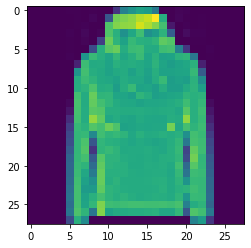

In [16]:
plt.imshow(train_images[720])

In [17]:
np.max(train_images)

1.0

In [18]:
train_images.shape

(60000, 28, 28)

In [23]:
from tensorflow import keras
input1 = keras.Input((28,28))
layer1 = keras.layers.Flatten()(input1)
l2 = keras.layers.Dense(128, activation = 'relu')(layer1)
output = keras.layers.Dense(10, activation = 'softmax')(l2)

model = keras.models.Model(input1, output)



In [25]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [45]:
input2 = keras.Input((28,28,1))
c1 = keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same',
                         activation='relu', use_bias=True)(input2)
p1 = keras.layers.MaxPool2D((2,2))(c1)
c2 = keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
                         activation='relu', use_bias=True)(p1)
p2 = keras.layers.MaxPool2D((2,2))(c2)
f1 = keras.layers.Flatten()(p2)
d1 = keras.layers.Dense(256, activation='relu')(f1)
#d2 = keras.layers.Dropout(0.2)(d1)
#d3 = keras.layers.Dense(128, activation='relu')(d1)
out = keras.layers.Dense(10, activation='softmax')(d1)

modelcnn = keras.models.Model(input2, out)
modelcnn.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               803

In [46]:
modelcnn.compile(optimizer='adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy',])

In [47]:
modelcnn.fit(train_images, train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 60s 63ms/step - loss: 0.5843 - accuracy: 0.7906
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.2873 - accuracy: 0.8974
Epoch 3/5
938/938 [==============================] - 59s 62ms/step - loss: 0.2282 - accuracy: 0.9165
Epoch 4/5
938/938 [==============================] - 58s 62ms/step - loss: 0.1976 - accuracy: 0.9269
Epoch 5/5
938/938 [==============================] - 58s 62ms/step - loss: 0.1701 - accuracy: 0.9375


In [48]:
modelcnn.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.2269 - accuracy: 0.9189


[0.22694668173789978, 0.9189000129699707]